# Отчёт о проделанной работе

## Введение

**Задача:** Прогнозирование продаж товаров сохранёнными ранее моделями.

## Что добавлено:

Добавлена возможность сохранять и загружать модели (в примере это catboost, т.к. он показал себя лучше всех). Для этого реализованы функции:
- save_models - сохраняет модели
- load_model - загружает модели
- load_test - позволяет загрузить данные для прогнозирования, указав их начало в датасете.

## Демонстрация работы класса

### Импорты

In [1]:
import warnings
import pandas as pd
from solution.solution import Solution
warnings.filterwarnings("ignore")

### Глобальные переменные

In [2]:
CALENDAR = pd.read_csv('../source/shop_sales_dates.csv')
DATA = pd.read_csv('../source/shop_sales.csv')
PRICES = pd.read_csv('../source/shop_sales_prices.csv')
STORES = sorted(DATA['store_id'].unique())

PERIODS = {"week": 7, "month": 30, "quarter": 90}

ROW = 5
COLUMN = 3

FEATURE_ENGINEERING_LAGS_OPTIONS = {
    "lag_count": 7,
    "seasonal_lag": 7,
    "seasonal_lag_count": 10,
    "mean_sizes": [7, 30],
}

SOLUTION = Solution(ROW, COLUMN, PERIODS)


### Препроцессинг (собираем фичи)

In [3]:
STORE = STORES[0]
SOLUTION.load(STORE, DATA, CALENDAR, PRICES)
SOLUTION.feature_engineering_lags(FEATURE_ENGINEERING_LAGS_OPTIONS)
SOLUTION.group_by("abs_day")

### Предсказания

#### Загружаем CatBoost

In [4]:
SOLUTION.load_models("../models/")

model ../models/exponential_smoothing_STORE_1_064.joblib not found, exponential_smoothing skipping...
model ../models/unobserved_components_STORE_1_064.joblib not found, unobserved_components skipping...
model ../models/sarimax_STORE_1_064.joblib not found, sarimax skipping...
model catboost loaded...


#### Загружаем тестовые данные

(понятно, что сейчас будет утечка, это просто как пример, что можно выбрать любое начало. Если дать датасет, у которого есть новые записи, можно тестить на них)

In [5]:
TEST_START = -180 
SOLUTION.load_test(TEST_START)

#### Делаем предикт

In [6]:
SOLUTION.predict()

predicting catboost models ...


### Скоринг

Результаты на week: 


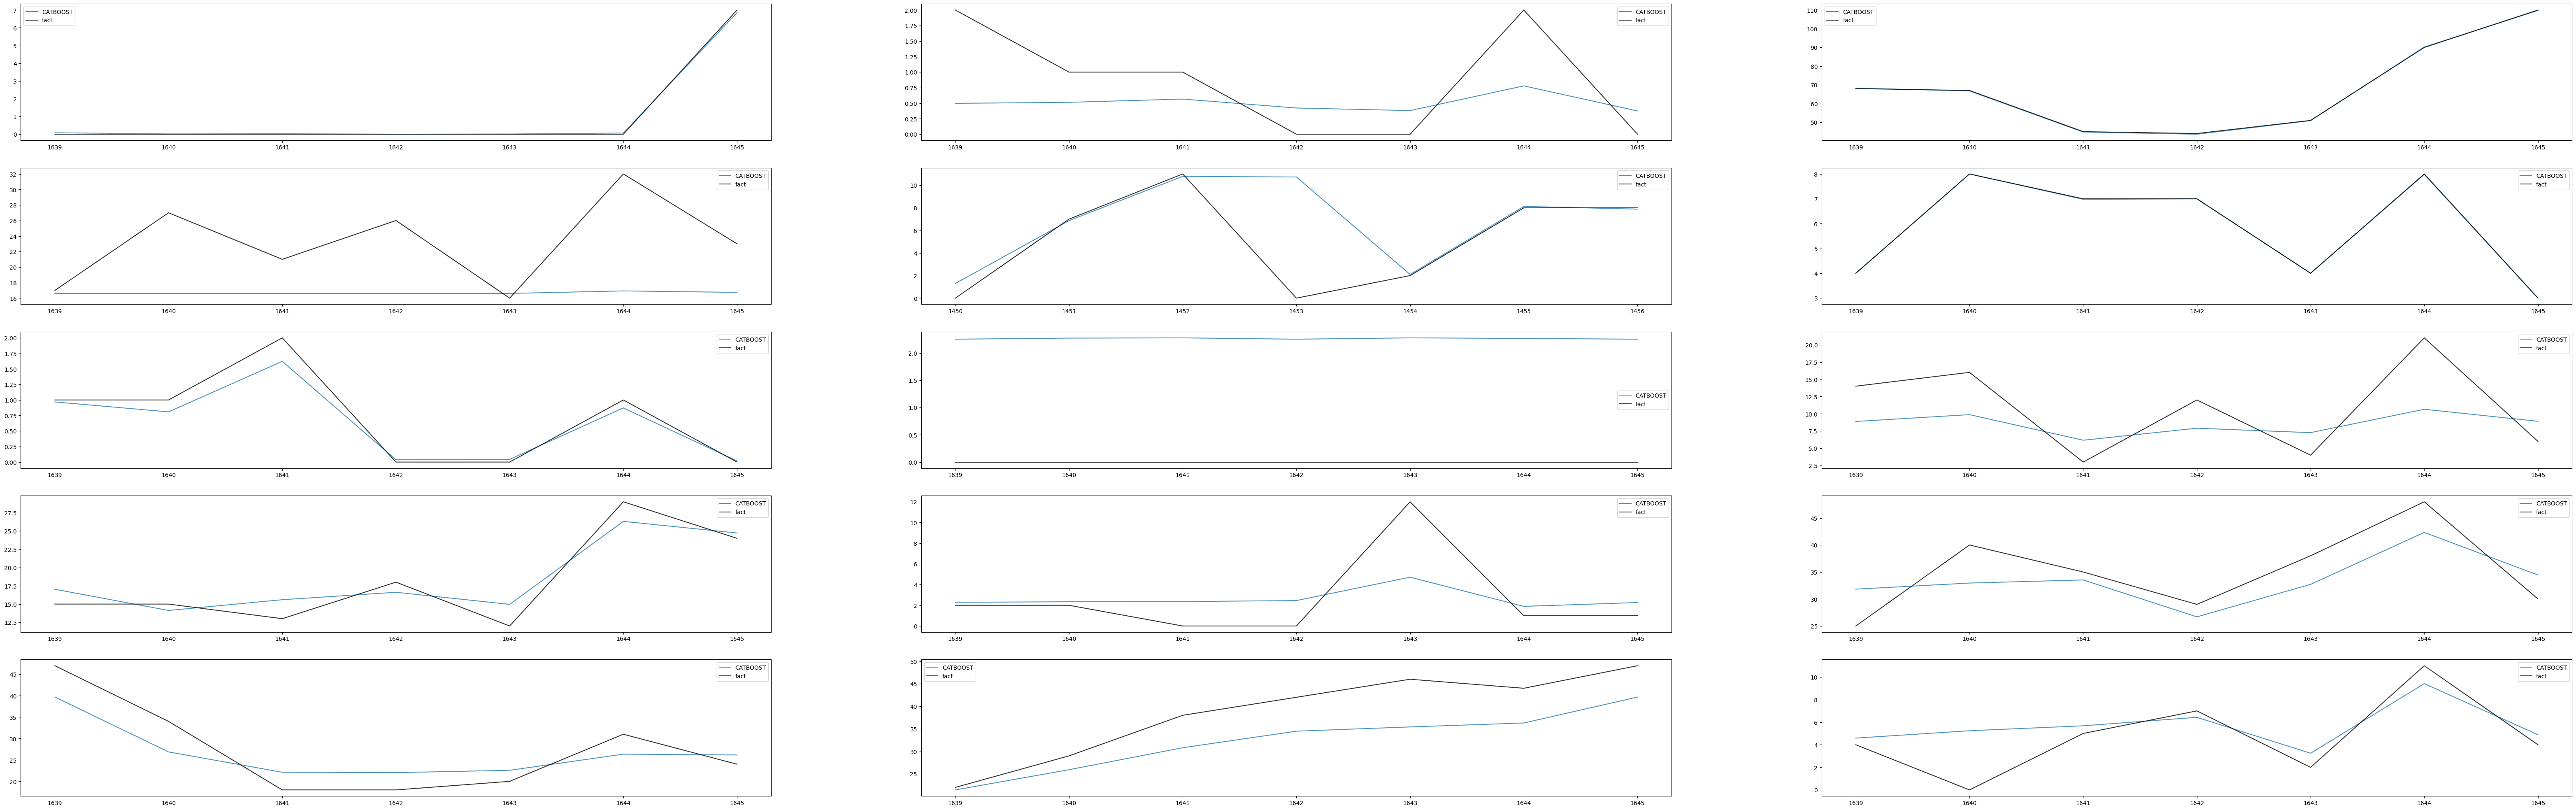

Результаты на month: 


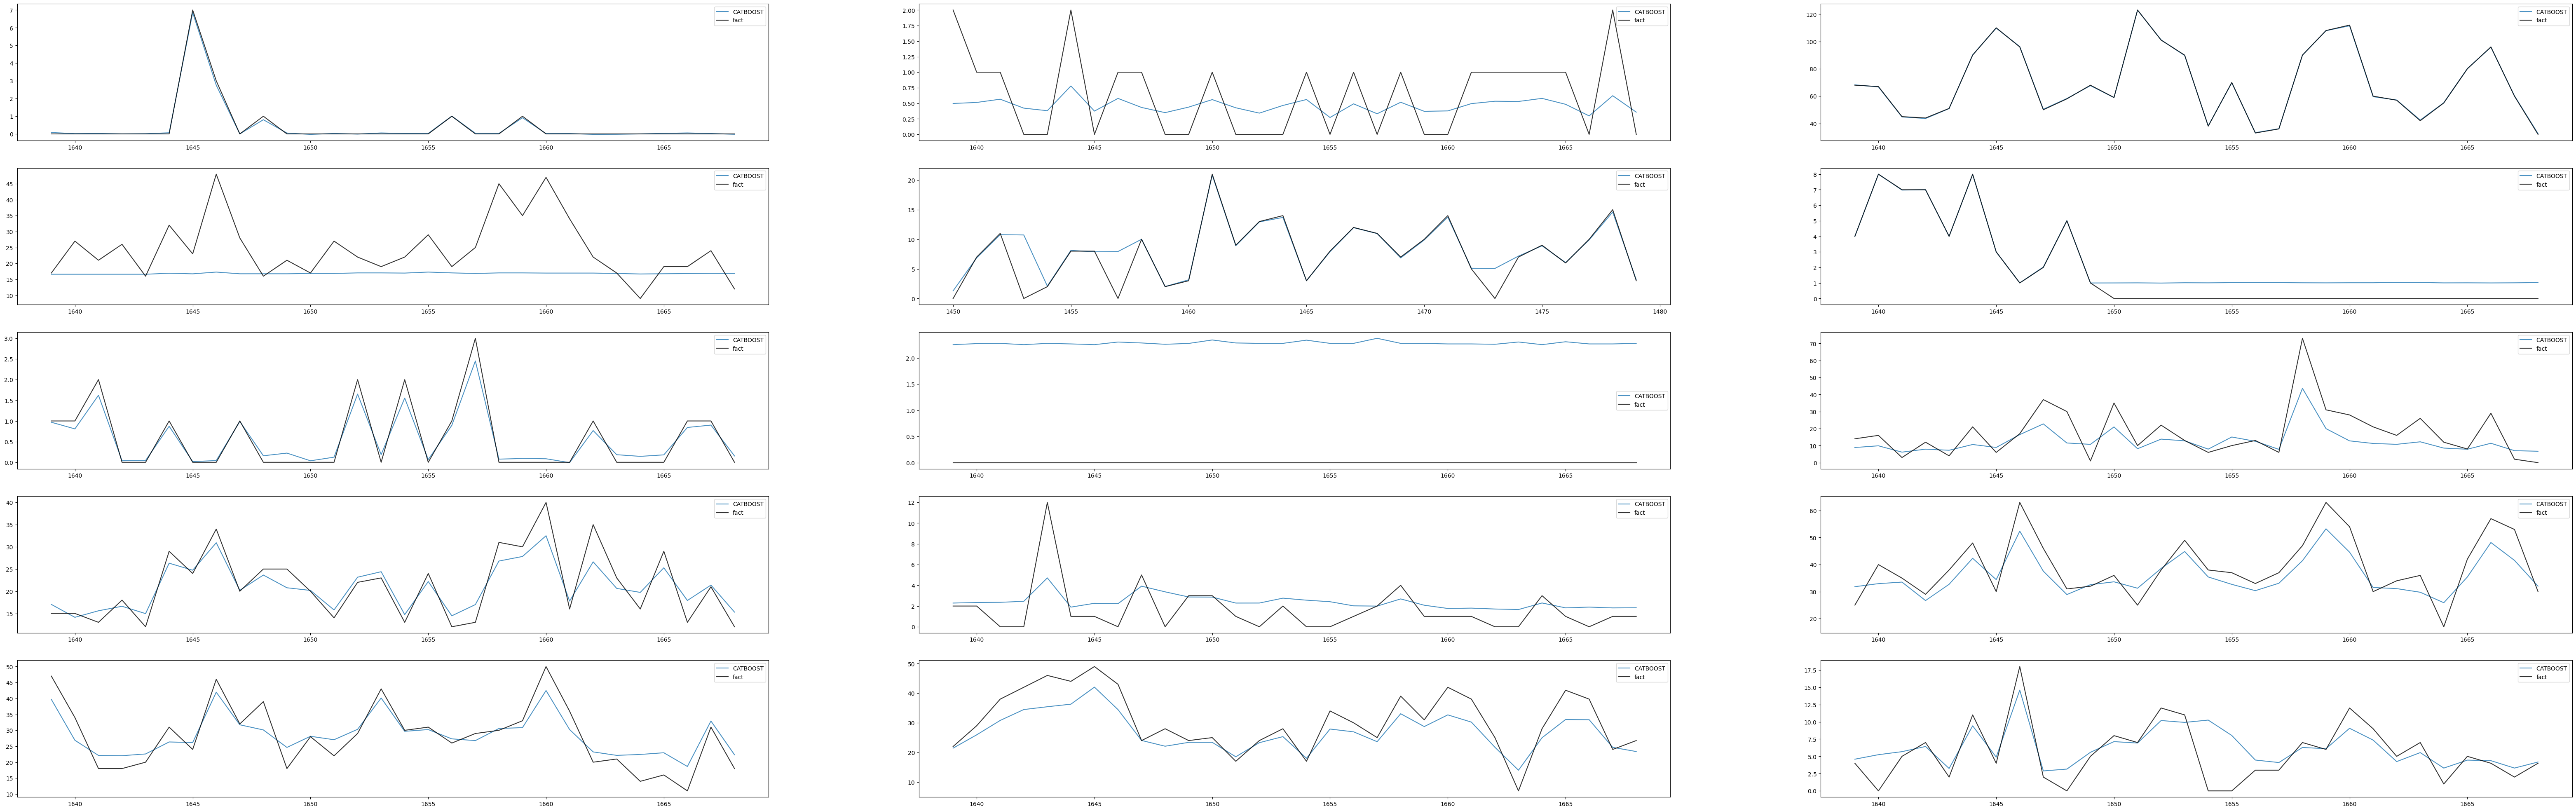

Результаты на quarter: 


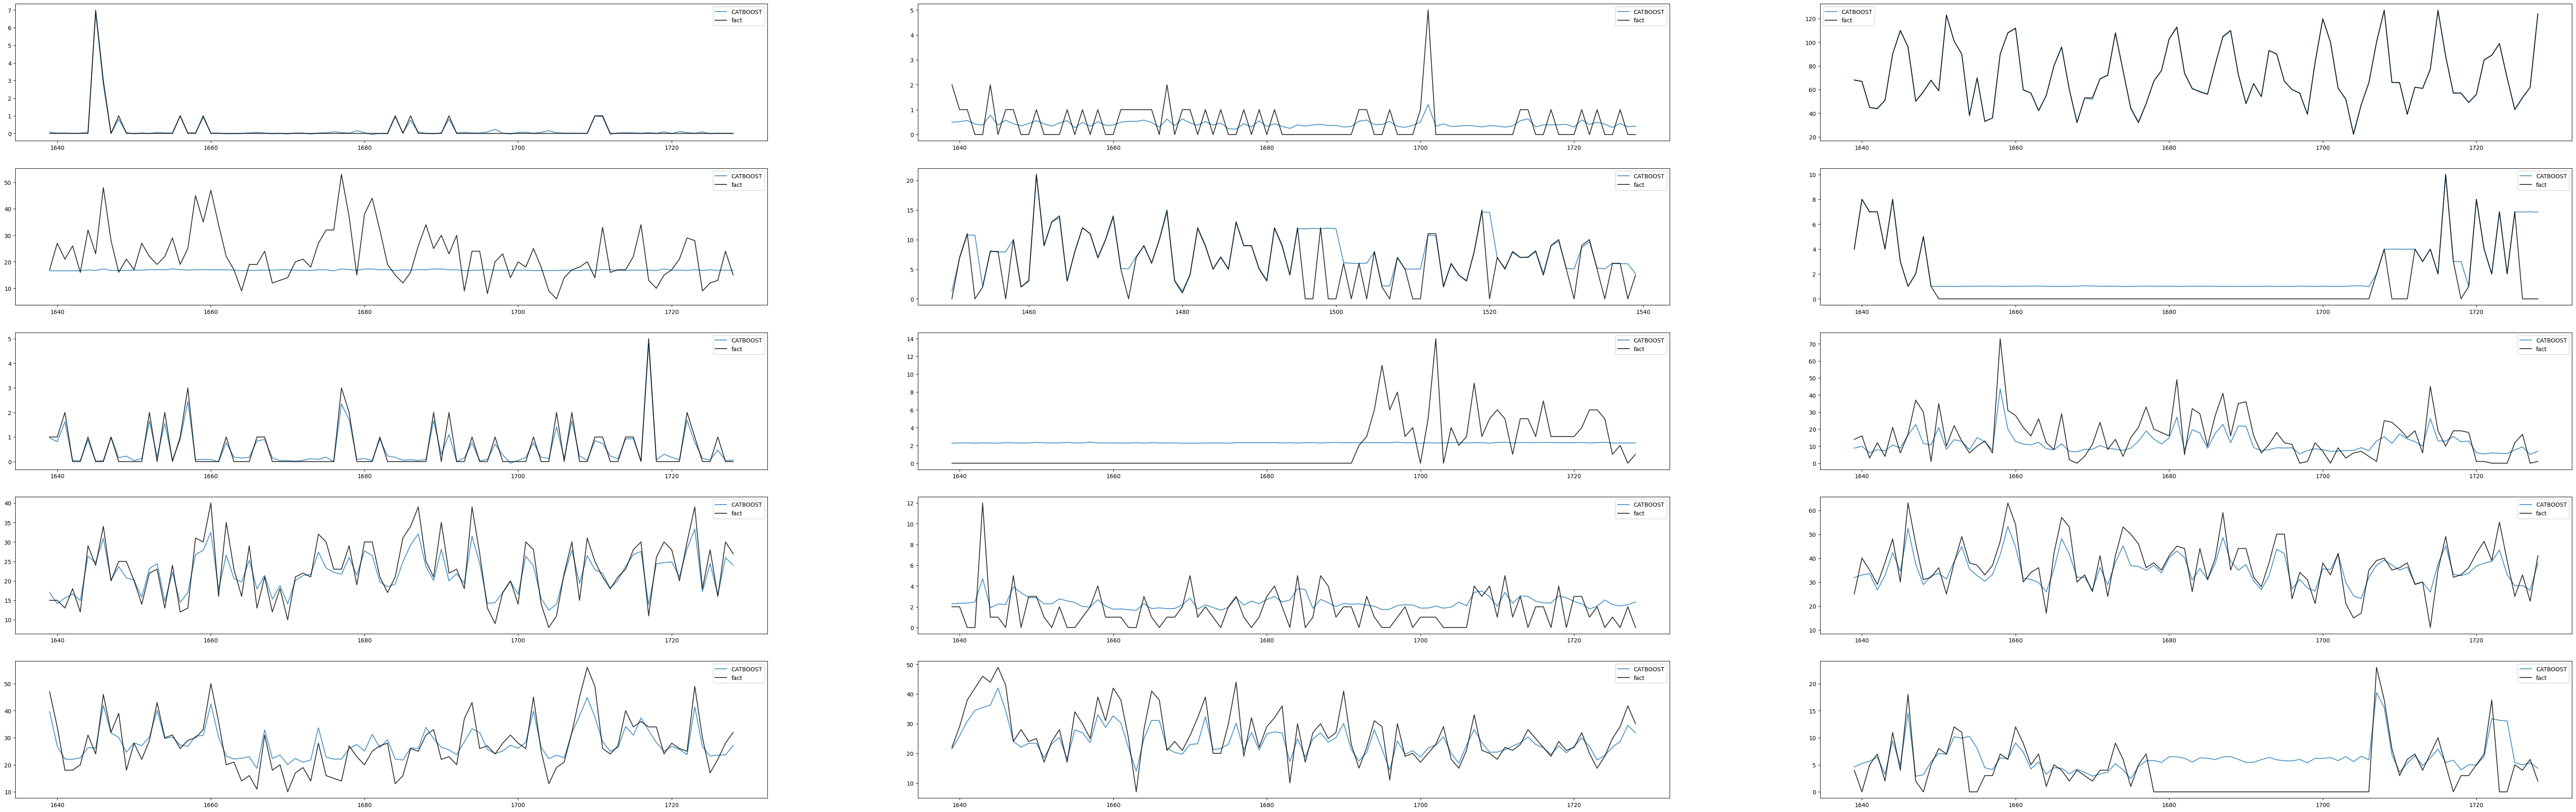

In [7]:
SOLUTION.scoring_predicts()

Выведем победителей:

In [8]:
SOLUTION.print_best()

Результаты по week:
STORE_1_064(0) best: CATBOOST (0.026111029593931162)
STORE_1_065(1) best: CATBOOST (0.4341202210613313)
STORE_1_090(2) best: CATBOOST (0.21975838081644383)
STORE_1_252(3) best: CATBOOST (6.257925718445051)
STORE_1_325(4) best: CATBOOST (0.13239377156878795)
STORE_1_339(5) best: CATBOOST (0.0016932977334942478)
STORE_1_376(6) best: CATBOOST (0.042994563028918575)
STORE_1_546(7) best: CATBOOST (2.268989732840404)
STORE_1_547(8) best: CATBOOST (4.092486251736652)
STORE_1_555(9) best: CATBOOST (2.028626110895196)
STORE_1_584(10) best: CATBOOST (1.2653328288180905)
STORE_1_586(11) best: CATBOOST (5.289870237642646)
STORE_1_587(12) best: CATBOOST (4.120346339350252)
STORE_1_714(13) best: CATBOOST (7.196306839062586)
STORE_1_727(14) best: CATBOOST (0.8855072603357179)
Результаты по month:
STORE_1_064(0) best: CATBOOST (0.025846776903847082)
STORE_1_065(1) best: CATBOOST (0.4363586375721201)
STORE_1_090(2) best: CATBOOST (0.2303140303212885)
STORE_1_252(3) best: CATBOOST (5

Посмотреть полный скоринг по предметы и периоду:

In [9]:
SOLUTION.scoring_results[SOLUTION.items[1]]["week"]

,mean,median,quan75,quan95,std,no_stationary,is_stationary,no_autocorrelation,is_homoscedasticity,is_mean_zero,is_normality
CATBOOST,0.688916,0.43412,0.853984,1.418434,0.468502,0.06272498040203461❌,0.1✅,0.0✅,0.4422399504628397✅,0.2839196630060299✅,0.1702157534619383✅
